In [14]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [15]:
# fetch data 

data_set = pd.read_csv('insurance.csv')

data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,"16,884.92"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33.00,3,no,southeast,"4,449.46"
3,33,male,22.70,0,no,northwest,"21,984.47"
4,32,male,28.88,0,no,northwest,"3,866.86"


In [16]:
# subset data to only include columns for smokers 

len(data_set)

# Simple linear regression (bmi vs. charges)
subset_data = data_set[data_set['smoker'] == 'yes'].drop(columns = ['smoker', 'sex', 'region', 'age', 'children'])

# Multiple linear regression and include age and children as features
# subset_data = data_set[data_set['smoker'] == 'yes'].drop(columns = ['smoker', 'sex', 'region'])

subset_data.head()

len(subset_data)

1338

,bmi,charges
0,27.90,"16,884.92"
11,26.29,"27,808.73"
14,42.13,"39,611.76"
19,35.30,"36,837.47"
23,31.92,"37,701.88"


274

In [17]:
subset_data.isna().sum()

bmi        0
charges    0
dtype: int64

In [18]:
subset_data.columns

Index(['bmi', 'charges'], dtype='object')

Text(0.5, 0, 'bmi')

Text(0, 0.5, 'charges')

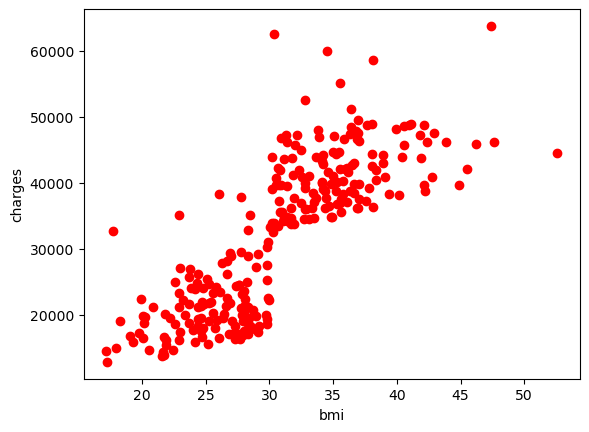

In [19]:
for col in subset_data.drop(columns = ['charges']).columns:
    plt.scatter(subset_data[col], subset_data['charges'], color = 'red', marker = 'o')
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.show()

In [20]:
# adding non-linear columns
# NOTE: BMI by definition is a non-linear variable in the first place
# Use if True if we want non-linear metrics
if False: 
    subset_data['agetimebmi'] = subset_data['age']*subset_data['bmi']
    subset_data['agesq'] = subset_data['age']**2
    subset_data['bmisq'] = subset_data['bmi']**2
    subset_data['bmicube'] = subset_data['bmi']**3   

Text(0.5, 0, 'bmi')

Text(0, 0.5, 'charges')

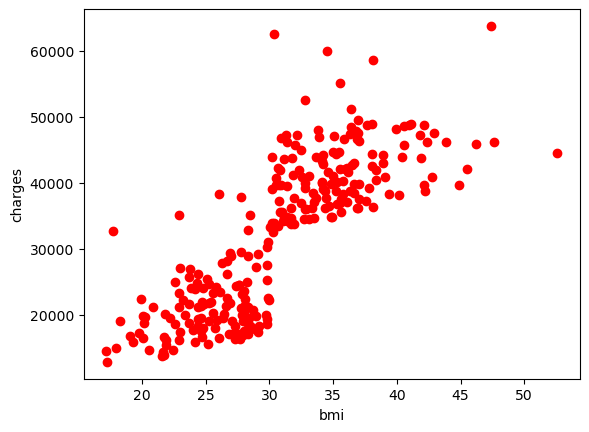

In [21]:
for col in subset_data.drop(columns = ['charges']).columns:
    plt.scatter(subset_data[col], subset_data['charges'], color = 'red', marker = 'o')
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['charges']), subset_data['charges'], test_size=0.25, random_state=35)
X_train
X_test
y_train
y_test

,bmi
298,34.39
780,24.40
664,22.99
759,38.17
1282,21.66
...,...
1156,44.88
1241,36.96
128,17.77
1321,26.70


,bmi
330,36.38
69,23.98
677,31.35
92,29.83
1313,34.70
...,...
57,31.68
53,34.43
826,31.79
828,30.78


298    38,746.36
780    18,259.22
664    27,037.91
759    36,307.80
1282   14,283.46
          ...   
1156   39,722.75
1241   49,577.66
128    32,734.19
1321   28,101.33
1022   42,211.14
Name: charges, Length: 205, dtype: float64

330    48,517.56
69     17,663.14
677    46,130.53
92     30,184.94
1313   36,397.58
          ...   
57     34,303.17
53     37,742.58
826    43,813.87
828    39,597.41
682    40,103.89
Name: charges, Length: 69, dtype: float64

In [23]:
model = LinearRegression(fit_intercept = True)

model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.6490827728483242

array([1537.88251302])

-15466.739946204147

In [11]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_charges'])
# When extending to multiple features remove .array.reshape(-1, 1)
test_output.head()

,pred_charges
330,"40,489.12"
69,"21,411.68"
677,"32,745.88"
92,"30,408.30"
1313,"37,897.78"


In [12]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_charges'] - test_output['charges']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_charges,charges
330,"40,489.12","48,517.56"
69,"21,411.68","17,663.14"
677,"32,745.88","46,130.53"
92,"30,408.30","30,184.94"
1313,"37,897.78","36,397.58"


Mean absolute error is 
4937.604098764748


In [13]:
abs(test_output['pred_charges'] - test_output['charges']).mean()/test_output['charges'].mean()
model.score(X_test, y_test)

0.1515302796702332

0.6454697828492975